In [1]:
import japanize_matplotlib
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from full_fred.fred import Fred

# FRED_API_KEY = os.getenv('FRED_API_KEY')
fred = Fred()
print(f"FRED APIキーが環境変数に設定されている：{fred.env_api_key_found()}")


def get_fred_data(name, start="2013-01-01", end=""):
    df = fred.get_series_df(name)[["date", "value"]].copy()
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.set_index("date")

    if end == "":
        df = df.loc[f"{start}":]
    else:
        df = df.loc[f"{start}":f"{end}"]

    return df

FRED APIキーが環境変数に設定されている：True


## University of Michigan: Consumer Sentiment
ソース： [University of Michigan: Consumer Sentiment](https://fred.stlouisfed.org/series/UMCSENT)

> 消費者のセンチメント（消費者マインド）をアンケートで調査して指数化した景気関連の経済指標です。CCI（Consumer Confidence Index）とも呼ばれています。一般的に個人消費やGDPとの相関性が高く、これらの先行指標として注目されています。 (出典：[ＳＭＢＣ日興証券株式会社](https://www.smbcnikko.co.jp/terms/japan/si/J0861.html)）

ソースとなるデータは[Surveys of Consumers, University of Michigan](http://www.sca.isr.umich.edu/)にて公開されています。「Index of Consumer Sentiment」のデータを取得します。

In [2]:
start_date = "2017-01-01"
df_UMCSENT = get_fred_data("UMCSENT", start=start_date)
df_UMCSENT["前年比"] = df_UMCSENT["value"].diff(12)
df_UMCSENT["前年比変化"] = df_UMCSENT["前年比"].diff()

## S&P 500
ソース： [Categories > Money, Banking, & Finance > Financial Indicators > Stock Market Indexes > S&P 500 | FRED](https://fred.stlouisfed.org/series/SP500)

In [3]:
df_SP500 = get_fred_data("SP500", start=start_date)
df_SP500["value"] -= df_SP500["value"].min()
df_SP500["value"] /= df_SP500["value"].max()
df_SP500["value"] *= 100
df_SP500["前月比"] = df_SP500["value"].diff(30)

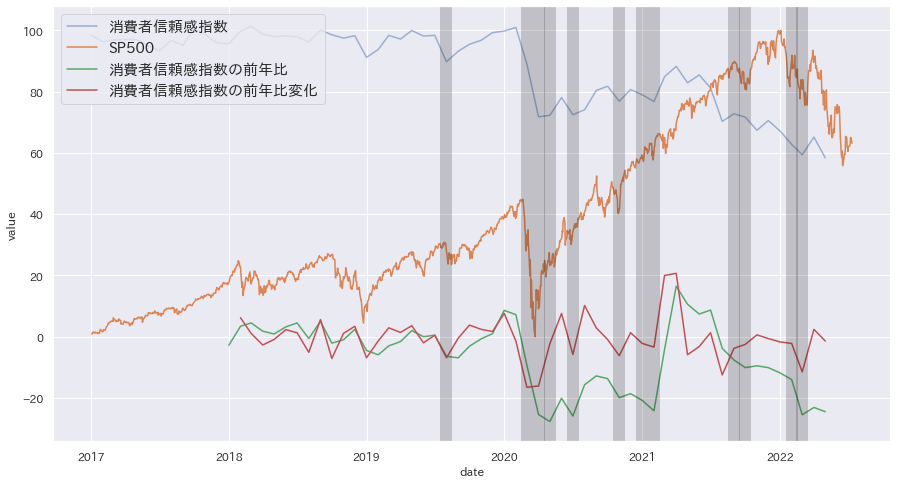

In [4]:
sns.set(rc={"figure.figsize": (15, 8)})
japanize_matplotlib.japanize()

# 折れ線グラフをプロット
sns.lineplot(data=df_UMCSENT, x="date", y="value", label="消費者信頼感指数", alpha=0.5)
sns.lineplot(data=df_SP500, x="date", y="value", label="SP500")
sns.lineplot(data=df_UMCSENT, x="date", y="前年比", label="消費者信頼感指数の前年比")
sns.lineplot(data=df_UMCSENT, x="date", y="前年比変化", label="消費者信頼感指数の前年比変化")

# 前年比との変化が大きいタイミングに線を引く
previous_down_date = df_UMCSENT.index[0]
for date, row in df_UMCSENT.iterrows():
    if row["前年比変化"] < -2 and row["前年比"] < -5:
        previous_down_date = date
        plt.axvline(x=date, alpha=0.2, linewidth=12, color="k")
        # plt.text(
        #    date + pd.DateOffset(10),
        #    -20,
        #    f'{date.strftime("%Y/%m/%d")}',
        #    rotation=90,
        # )

plt.legend(fontsize=15, loc="upper left")
plt.show()